<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/Mnist_Number_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
mnist_0 = '/content/sample_data/umg'
mnist_1 = '/content/sample_data/1'
mnist_2 = '/content/sample_data/2'
mnist_3 = '/content/sample_data/3'

In [68]:
import os

train_mnists_fname_0 = os.listdir(os.path.join(mnist_0))
train_mnists_fname_1 = os.listdir(os.path.join(mnist_1))
train_mnists_fname_2 = os.listdir(os.path.join(mnist_2))
train_mnists_fname_3 = os.listdir(os.path.join(mnist_3))

In [69]:
import PIL
X = []
y = []

# 0
for i in range(len(train_mnists_fname_0)):
  f = os.path.join(mnist_0, train_mnists_fname_0[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X.append(arr)
  y.append(0)

In [70]:
# 1
for i in range(len(train_mnists_fname_1)):
  f = os.path.join(mnist_1, train_mnists_fname_1[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X.append(arr)
  y.append(1)

In [71]:
# 2
for i in range(len(train_mnists_fname_2)):
  f = os.path.join(mnist_2, train_mnists_fname_2[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X.append(arr)
  y.append(2)

In [72]:
# 3
for i in range(len(train_mnists_fname_3)):
  f = os.path.join(mnist_3, train_mnists_fname_3[i])
  image = PIL.Image.open(f) # pillow타입의 이미지 저장
  image = image.resize((224,224))# 각자다른 사이즈의 이미지를 같은 사이즈로 resize해준다
  arr = np.array(image) # pillow 타입의 이미지를 np.array로
  X.append(arr)
  y.append(3)

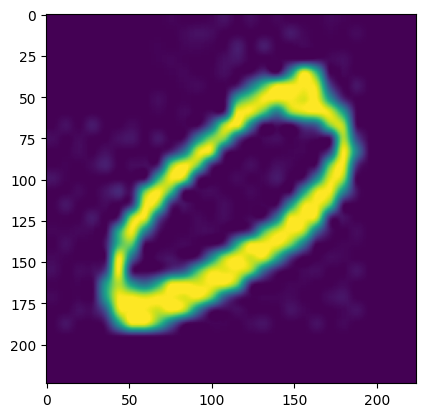

In [20]:
plt.imshow(X[0])
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
len(X_train), len(X_val), len(y_train), len(y_val)

(320, 80, 320, 80)

In [75]:
X_train = np.array(X_train)
X_val = np.array(X_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [76]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((320, 224, 224), (80, 224, 224), (320,), (80,))

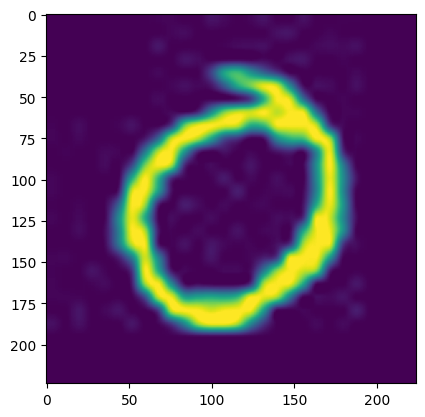

In [15]:
plt.imshow(X_train[0])
plt.show()

## Scaling

In [77]:
X_train = X_train.astype('float32')/225.
X_val = X_val.astype('float32')/255.

In [78]:
X_train = X_train.reshape(-1, 224*224)

In [79]:
X_val = X_val.reshape(-1, 224*224)

In [80]:
from keras.utils import to_categorical

y_train_o =  to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [84]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=256, activation='relu', input_shape=(224*224,)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=4, activation='softmax'),
])# 마지막 layer에는 y_val의 열개수로

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               12845312  
                                                                 
 dense_37 (Dense)            (None, 64)                16448     
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 4)                 260       
                                                                 
Total params: 12,866,180
Trainable params: 12,866,180
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
EPOCHS = 30
BATCH = 64

history = model.fit(
    X_train, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH,
    validation_data =(X_val, y_val_o),
    verbose = 1
)

Epoch 1/30
5/5 [==============================] - 3s 313ms/step - loss: 1.0924 - accuracy: 0.6594 - val_loss: 0.4090 - val_accuracy: 0.8625
Epoch 2/30
5/5 [==============================] - 1s 260ms/step - loss: 0.2146 - accuracy: 0.9250 - val_loss: 0.1686 - val_accuracy: 0.9750
Epoch 3/30
5/5 [==============================] - 1s 259ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.2237 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 1s 260ms/step - loss: 0.0334 - accuracy: 0.9875 - val_loss: 0.1321 - val_accuracy: 0.9500
Epoch 5/30
5/5 [==============================] - 1s 260ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9625
Epoch 6/30
5/5 [==============================] - 2s 444ms/step - loss: 0.0049 - accuracy: 0.9969 - val_loss: 0.1850 - val_accuracy: 0.9750
Epoch 7/30
5/5 [==============================] - 2s 322ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1254 - val_accuracy: 0.9625
Epoch 8/30
5/5 [====

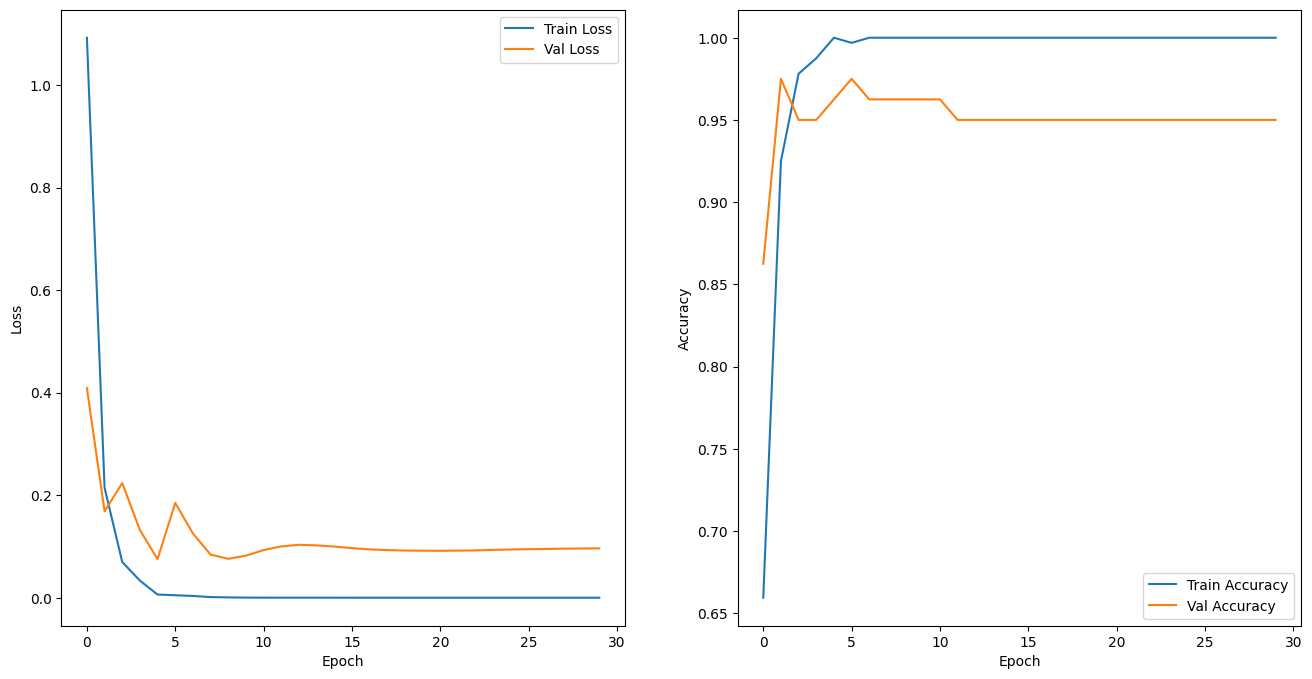

In [87]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

plot_history(history)